# 一、梯度下降原理

## 1、为什么负梯度方向是最快下降方向

**参考1：[为什么局部下降最快的方向就是梯度的负方向？](https://blog.csdn.net/red_stone1/article/details/80212814)**

从泰勒一阶展开式的角度，推导了，当下降方向与梯度方向相反时，函数值会下降，且是下降的最大方向

[多元变量函数，泰勒如何展开？](https://zhuanlan.zhihu.com/p/32274749)

$f(\theta)-f\left(\theta_{0}\right) \approx \eta v \cdot \nabla f\left(\theta_{0}\right)<0$

$\eta$为标量，表示步进长度。在$\eta$一定时，只有当v与 $\nabla f\left(\theta_{0}\right)$ 完全相反方向时，不仅保证值是负值，且值最大。

**参考2：[机器学习－梯度下降算法](http://www.hanlongfei.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0/2015/07/29/gradient/)**
这是一个在CMU读书的学生的博客，感觉国外的教学很好

从方向导数求极值的角度，证明了方向导数的极值等于函数在该点梯度的范数，感觉这里的推导更严谨一些

# 二、自己实现

In [2]:
import numpy as np
import torch
from copy import deepcopy
data = np.loadtxt("Admission_Predict.csv",delimiter=",",skiprows=1)

OSError: Admission_Predict.csv not found.

In [135]:
data.shape

(500, 9)

In [216]:
data[:5]

array([[  1.  , 337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ,
          0.92],
       [  2.  , 324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ,
          0.76],
       [  3.  , 316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ,
          0.72],
       [  4.  , 322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ,
          0.8 ],
       [  5.  , 314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ,
          0.65]])

In [217]:
x_data_array = data[:,1:3]
y_data_array = data[:,-1]
print("x_data.shape:",x_data.shape)
print("y_data.shape:",y_data.shape)

x_data.shape: torch.Size([500, 2])
y_data.shape: torch.Size([500])


In [218]:
x_data = torch.Tensor(x_data_array)
y_data = torch.Tensor(y_data_array)

In [1]:
class Model(torch.nn.Module):
    
    def __init__(self, dim_in, dim_out):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(dim_in, dim_out, bias=False) #为了简单，不加偏置
        self.apply(weights_init)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Linear') != -1:
            m.weight.data = torch.randn(m.weight.data.size()[0],m.weight.data.size()[1])
            #m.bias.data = torch.randn(m.bias.data.size()[0])

NameError: name 'torch' is not defined

In [301]:
def weights_init(m):
    classname = m.__class__.__name__
    
    if classname.find('Linear') != -1:
        m.weight.data = torch.randn(m.weight.data.size()[0],m.weight.data.size()[1])
        #m.bias.data = torch.randn(m.bias.data.size()[0])

In [294]:
r = np.arange(-5,5,0.1)

In [295]:
w = []
for i in r:
    tmp = []
    tmp.append(i)
    for j in r:
        tmp.append(j)
        tmp1 = deepcopy(tmp)
        w.append(tmp1)
        tmp.pop()

In [296]:
w = np.array(w)

In [297]:
def cal_loss(wi):
    L = np.average(np.power(x_data_array @ wi - y_data_array,2))/2
    return L

In [298]:
loss = []
for i in range(w.shape[0]):
    loss.append(cal_loss(w[i]))

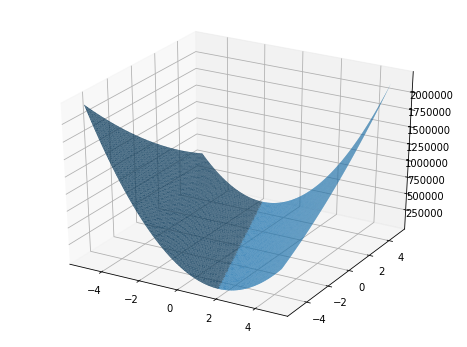

In [299]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# data = # your matrix here

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

x = w[:,0]
y = w[:,1]
z = loss

ax.plot_trisurf(x,y,z)

## 1、BGD

In [316]:
model_BGD = Model(x_data.shape[1],1)
model_BGD.apply(weights_init)

Model(
  (linear): Linear(in_features=2, out_features=1, bias=False)
)

In [317]:
epochs = 100
rate = 0.000001

In [ ]:
def opt_BGD(epochs, rate):
    for each in range(epochs):
    y_pred = model_BGD(x_data)
    loss = torch.mean(torch.pow(y_pred-y_data, 2))/2
    loss.backward()
    for i in model_BGD.parameters():
        print("para: ",i.data)
        i.data -= rate*i.grad.data
        i.grad.data.zero_()
    print("in epoch ",each," loss is ",loss.data)

In [318]:
for each in range(epochs):
    y_pred = model_BGD(x_data)
    loss = torch.mean(torch.pow(y_pred-y_data, 2))/2
    loss.backward()
    for i in model_BGD.parameters():
        print("para: ",i.data)
        i.data -= rate*i.grad.data
        i.grad.data.zero_()
    print("in epoch ",each," loss is ",loss.data)

para:  tensor([[ 0.3253, -0.2013]])
in epoch  0  loss is  tensor(3255.9028)
para:  tensor([[ 0.2998, -0.2100]])
in epoch  1  loss is  tensor(2568.7031)
para:  tensor([[ 0.2771, -0.2177]])
in epoch  2  loss is  tensor(2026.5691)
para:  tensor([[ 0.2569, -0.2245]])
in epoch  3  loss is  tensor(1598.8763)
para:  tensor([[ 0.2390, -0.2306]])
in epoch  4  loss is  tensor(1261.4680)
para:  tensor([[ 0.2231, -0.2360]])
in epoch  5  loss is  tensor(995.2867)
para:  tensor([[ 0.2090, -0.2407]])
in epoch  6  loss is  tensor(785.2939)
para:  tensor([[ 0.1964, -0.2450]])
in epoch  7  loss is  tensor(619.6292)
para:  tensor([[ 0.1853, -0.2488]])
in epoch  8  loss is  tensor(488.9360)
para:  tensor([[ 0.1754, -0.2521]])
in epoch  9  loss is  tensor(385.8316)
para:  tensor([[ 0.1666, -0.2551]])
in epoch  10  loss is  tensor(304.4921)
para:  tensor([[ 0.1588, -0.2577]])
in epoch  11  loss is  tensor(240.3228)
para:  tensor([[ 0.1518, -0.2601]])
in epoch  12  loss is  tensor(189.6993)
para:  tensor([[ 